## Simple plots of final MSM properties

-------------------
 - Plot setup for this notebook

In [69]:
n_timescales = 4
cc2 = list(get_hls_palette(n_timescales))

--------------------
#### Implied Timescales from final MSMs

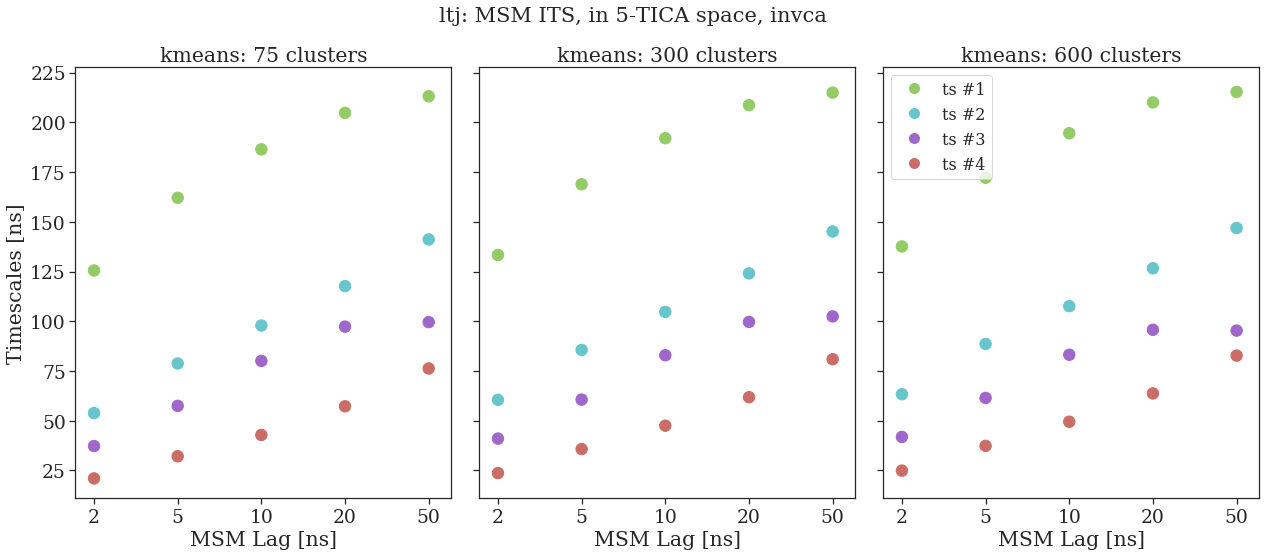

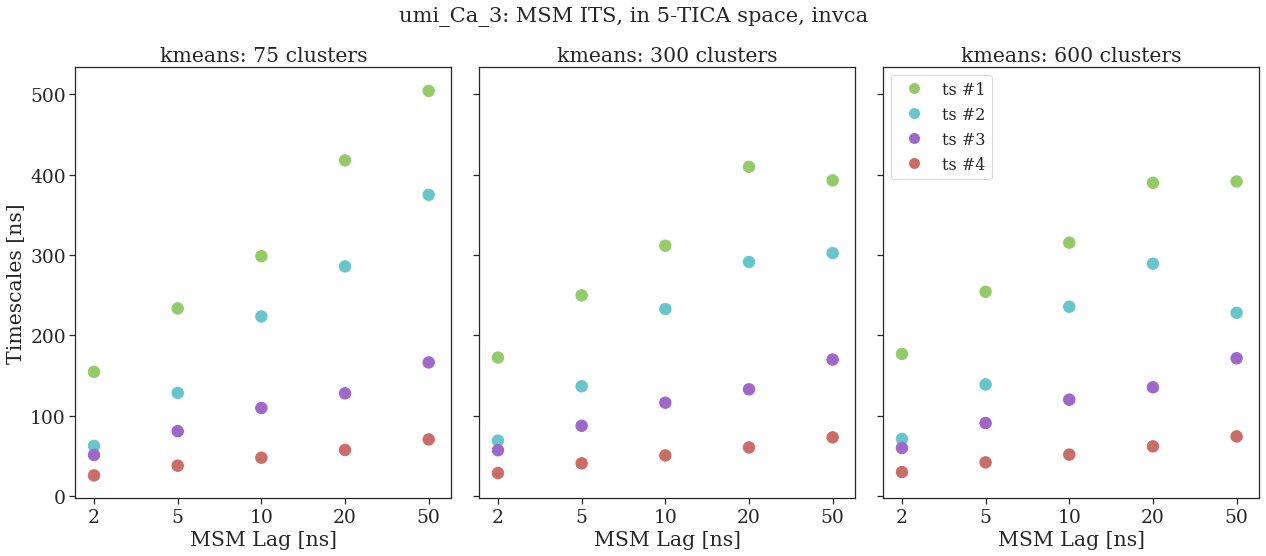

In [70]:
for feat,nm,dataset in aswa_tools.iter_models(all_models):
    
    for clust_method, setups in dataset["its"].items():
        
        n_configs = len(setups)
        if not n_configs: continue
            
        fig, axes = plt.subplots(1, n_configs,
            figsize=(6*n_configs, 8), sharey="row",squeeze=False)

        for i,setup in enumerate(setups):

            try:
                setup["result"] = pyemma.load(setup["result"]
                    ) if isinstance(setup["result"], (str,Path)
                    ) else setup["result"]
            except:
                continue
                
   #         plot_title = ""
            clustering = aswa_tools.get_matching_input(
                dataset["cluster_%s"%clust_method],
                *setup["par"])
    
            plot_title = "%s: %d clusters" % (
                clust_method, clustering.clustercenters.shape[0])
        
            if "regspace" in clust_method:
                plot_title += ", %0.2f dmin"%setup["par"][1]

            axes[0][i].set_title(plot_title)
            axes[0][i].set_xlabel("MSM Lag [ns]")
    
            if i == 0:
                axes[0][i].set_ylabel("Timescales [ns]")
            
            for j,ts in enumerate((pyemma.load(setup["result"])
                    if isinstance(setup["result"], (str,Path))
                    else setup["result"]).timescales
            ):
                axes[0][i].scatter(
                    x=[j for _ in list(range(ts.shape[0]))[:n_timescales]],
                    y=ts[:n_timescales] / step_per_ns[label_longtraj],
                    c=cc2[:n_timescales],
                    s=130,
                )
            
            if i > 0:
                axes[0][i].yaxis.label.set_visible(False)
                #axes[2,i].yaxis.label.set_visible(False)

            axes[0][i].set_xticks(range(j+1))
            axes[0][i].set_xticklabels(
                [("%.2f"%(setup["result"].models[J].lag / step_per_ns[label_longtraj])
                if setup["result"].models[J].lag / step_per_ns[label_longtraj] < 1
                else "%d"%(setup["result"].models[J].lag / step_per_ns[label_longtraj]))
                for J in range(j+1)],
                #rotation=45,
            )
            
        patches = [plt.Line2D(range(1), range(1),
                        color="w",
                        markerfacecolor=c,
                        label="ts #%d"%(1+k),
                        marker="o",
                        markersize=12,
                   )
                   for k,c in enumerate(cc2[:n_timescales])]
        
        axes[0][-1].legend(
            handles=patches,
            loc="upper left",
            fontsize=16,
        #    ncol=2,
        #    handlelength=0.5,
        )
        plt.suptitle(
            "%s: MSM ITS, in %d-TICA space, %s"%(
                nm, n_tica_dim, feat), fontsize=21,
        )
        fig.tight_layout(rect=[0, 0, 1, 0.95])
        plt.savefig("analyses/%s/msm/its_%s-%s.png"%(
            nm, clust_method, feat), dpi=300)

-------------

-------------

-------------

-------------

-------------

-------------

-------------

-------------

-------------

-------------

-------------

-------------

-------------